In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
data_train = pd.read_csv("data set\\spliting data\\train part_1.csv")





data_train_1 = pd.read_csv("data set\spliting data\\train part_1.csv")
data_train_2 = pd.read_csv("data set\\spliting data\\train part_2.csv")
data_train_3 = pd.read_csv("data set\\spliting data\\train part_3.csv")
data_train_4 = pd.read_csv("data set\\spliting data\\train part_4.csv")
data_train_5 = pd.read_csv("data set\\spliting data\\train part_5.csv")





data_train=pd.concat([data_train_1, data_train_2,data_train_3,data_train_4,data_train_5], axis=0)




data_test= pd.read_csv("data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("data set\\spliting data\\all_val.csv")

data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)



In [3]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,fake,-334.737671,76.867676,-30.929707,-17.169949,-31.834557,-39.132633,-16.459024,-20.722021,-11.842106,...,4.525660,4.289870,3.326485,2.481814,0.728558,-1.242968,-3.518845,-4.317857,-4.443309,-2.783504
1,real,-298.993988,41.489319,-18.550697,-13.485248,-31.153923,-32.223690,-28.038900,-13.269815,-11.574376,...,4.392698,4.121765,2.897160,2.084303,0.699451,-1.011674,-3.081813,-4.456837,-4.444040,-2.911205
2,fake,-336.030487,41.516235,-6.396549,-8.078271,-31.478474,-36.112930,-26.826813,-11.030613,-15.456207,...,4.335268,4.404176,3.471987,2.222079,0.547548,-1.628364,-3.549931,-3.932189,-3.914067,-2.324235
3,fake,-321.889893,39.891376,-15.337770,-15.477080,-38.171471,-33.393559,-15.102863,-11.547585,-17.715349,...,4.332569,4.087112,2.980768,1.995950,0.577060,-1.446961,-3.366797,-4.223256,-4.285361,-2.889634
4,fake,-312.989838,44.834717,-25.237486,-16.116037,-37.163395,-31.625546,-25.217836,-15.205007,-17.971375,...,4.822773,4.748765,3.346043,2.517967,0.568063,-1.215140,-3.398031,-4.425672,-4.282098,-2.804538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-326.663055,34.797848,-15.511516,-12.016246,-27.606140,-35.918320,-14.808201,-9.123057,-14.271398,...,3.787317,3.358525,2.594391,2.087554,0.986172,-0.929900,-2.785788,-4.066984,-4.541420,-2.994805
117889,fake,-314.613495,15.803115,-15.006111,-0.920621,-33.632286,-40.066391,-28.264914,-14.413186,-19.754248,...,4.727478,4.683538,3.309240,2.434035,0.569893,-1.199932,-3.519818,-4.291672,-4.309005,-2.780853
117890,fake,-278.911316,24.064323,-14.577132,3.200478,-25.720873,-36.016327,-30.842222,-12.061892,-21.214760,...,3.993796,3.602313,2.503438,2.101569,0.911011,-0.709978,-2.940509,-4.096052,-4.142426,-2.930942
117891,fake,-324.491028,29.108953,-13.913337,-3.908259,-36.086018,-36.504414,-27.925045,-3.787889,-12.372801,...,4.428850,4.095093,3.326685,2.231799,0.675572,-1.199516,-3.392690,-3.995245,-4.128115,-2.556367


# Encoding

In [4]:
def encodeing(row):
    if row == "real":
      row = 0
    else :
      row =1
    return row

      

In [5]:
# data_train['label'] = data_train['label'].apply(encodeing)
# data_test['label']=data_test['label'].apply(encodeing)
# data_val['label']=data_test['label'].apply(encodeing)

In [6]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,fake,-334.737671,76.867676,-30.929707,-17.169949,-31.834557,-39.132633,-16.459024,-20.722021,-11.842106,...,4.525660,4.289870,3.326485,2.481814,0.728558,-1.242968,-3.518845,-4.317857,-4.443309,-2.783504
1,real,-298.993988,41.489319,-18.550697,-13.485248,-31.153923,-32.223690,-28.038900,-13.269815,-11.574376,...,4.392698,4.121765,2.897160,2.084303,0.699451,-1.011674,-3.081813,-4.456837,-4.444040,-2.911205
2,fake,-336.030487,41.516235,-6.396549,-8.078271,-31.478474,-36.112930,-26.826813,-11.030613,-15.456207,...,4.335268,4.404176,3.471987,2.222079,0.547548,-1.628364,-3.549931,-3.932189,-3.914067,-2.324235
3,fake,-321.889893,39.891376,-15.337770,-15.477080,-38.171471,-33.393559,-15.102863,-11.547585,-17.715349,...,4.332569,4.087112,2.980768,1.995950,0.577060,-1.446961,-3.366797,-4.223256,-4.285361,-2.889634
4,fake,-312.989838,44.834717,-25.237486,-16.116037,-37.163395,-31.625546,-25.217836,-15.205007,-17.971375,...,4.822773,4.748765,3.346043,2.517967,0.568063,-1.215140,-3.398031,-4.425672,-4.282098,-2.804538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-326.663055,34.797848,-15.511516,-12.016246,-27.606140,-35.918320,-14.808201,-9.123057,-14.271398,...,3.787317,3.358525,2.594391,2.087554,0.986172,-0.929900,-2.785788,-4.066984,-4.541420,-2.994805
117889,fake,-314.613495,15.803115,-15.006111,-0.920621,-33.632286,-40.066391,-28.264914,-14.413186,-19.754248,...,4.727478,4.683538,3.309240,2.434035,0.569893,-1.199932,-3.519818,-4.291672,-4.309005,-2.780853
117890,fake,-278.911316,24.064323,-14.577132,3.200478,-25.720873,-36.016327,-30.842222,-12.061892,-21.214760,...,3.993796,3.602313,2.503438,2.101569,0.911011,-0.709978,-2.940509,-4.096052,-4.142426,-2.930942
117891,fake,-324.491028,29.108953,-13.913337,-3.908259,-36.086018,-36.504414,-27.925045,-3.787889,-12.372801,...,4.428850,4.095093,3.326685,2.231799,0.675572,-1.199516,-3.392690,-3.995245,-4.128115,-2.556367


In [7]:
count = data_train['label'].value_counts()
print(count)


fake    107413
real     10480
Name: label, dtype: int64


In [8]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels

X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels


In [9]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_val=pd.get_dummies(y_val)
y_test=pd.get_dummies(y_test)

In [10]:
y_train

,fake,real
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
117888,1,0
117889,1,0
117890,1,0
117891,1,0


In [11]:
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 128)          512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 63, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8064)              0         
                                                                 
 dense (Dense)               (None, 64)                516160    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 516,802
Trainable params: 516,802
Non-trainable params: 0
__________________________________________________

In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.0560 - accuracy: 0.9809 - 1s/epoch - 3ms/step
Test Accuracy: 98.09%


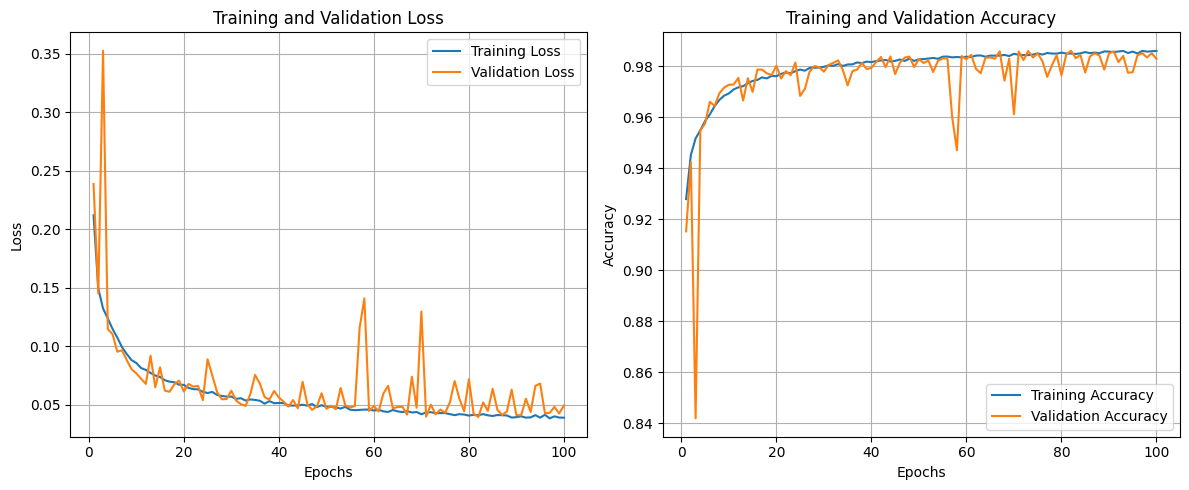

In [13]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [14]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


461/461 [==============================] - 1s 1ms/step


In [15]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,1,0
14734,1,0


In [16]:
y_ture=np.argmax(y_test.values, axis=1)


In [17]:
y_ture

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Test f1_score : 88.24%


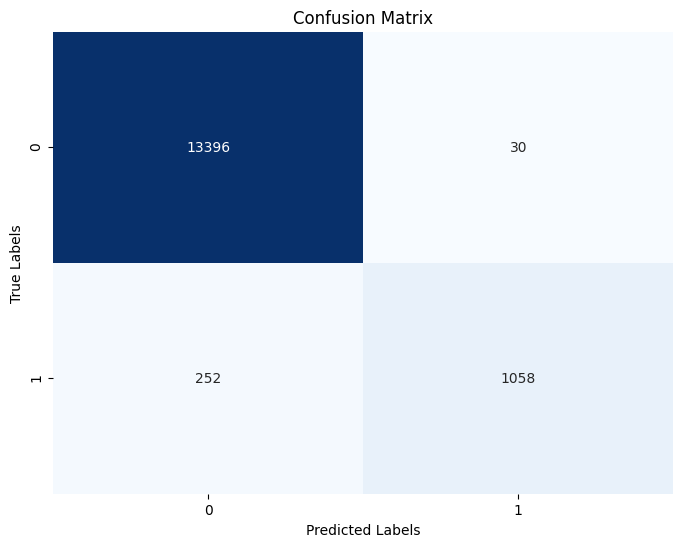

In [18]:


from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,1,0
14734,1,0


# eraly stopping

In [21]:

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

model = Sequential()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
# Add a 1D convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),callbacks=[callback])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 126, 128)          512       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 63, 128)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8064)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                516160    
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 516,802
Trainable params: 516,802
Non-trainable params: 0
________________________________________________

In [22]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.0519 - accuracy: 0.9830 - 1s/epoch - 2ms/step
Test Accuracy: 98.30%


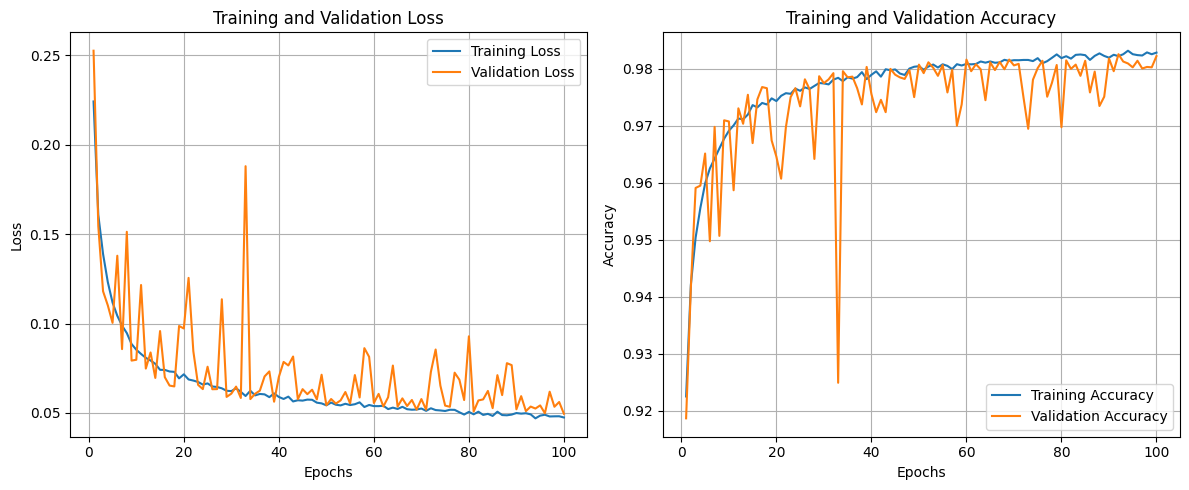

In [23]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 1ms/step
Test f1_score : 90.12%


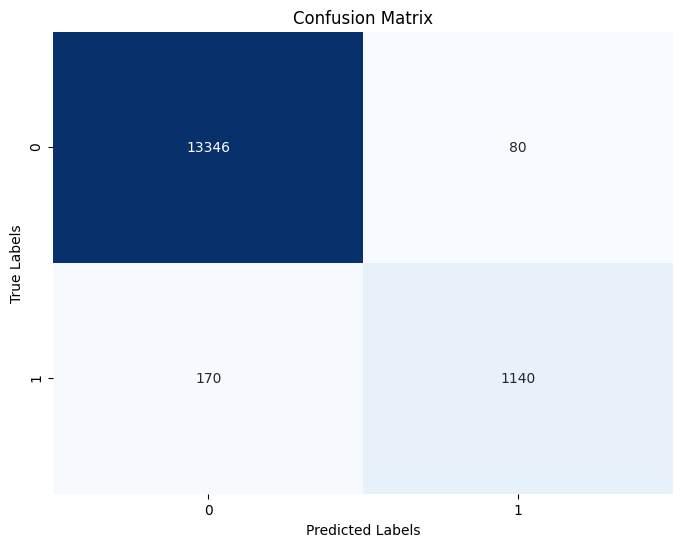

In [24]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()